__STEP-1:-importing all thr libraries__

In [12]:
## importing the necessary liraries
 ## data manipulation provides data structure 
import pandas as pd
##numerical computing supports arrays ,matrices,etc
import numpy as np
## ploting libraries 
import matplotlib.pyplot as plt 
## data visualization Library
import seaborn as sns
## allows to connect to SQLite database using python 
import sqlite3

In [8]:
#create a sql connection to the sqlite database 
con = sqlite3.connect(r"C:\Users\Lenovo\Downloads\password_data.sqlite")

In [16]:
##sql query to read the table
data =pd.read_sql_query("SELECT *FROM Users",con)

In [20]:
##shape is a thing that will give rows and columns 
data.shape 

(100000, 3)

In [22]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


In [24]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [28]:
##inplace=True means that the changes are made directly innthe original data not copy 
data.drop(["index"],axis=1,inplace=True)

In [30]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [32]:
data.duplicated().sum()

0

In [36]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [38]:
data.isnull().any().sum()

0

In [44]:
##checking data types of every variable ---its Dtypes-dont forget the d 
data.dtypes 

password    object
strength     int64
dtype: object

In [46]:
data.strength

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [48]:
data["strength"].unique()

array([1, 2, 0], dtype=int64)

__Now We Will Analyze the Password column and do Semantic Analysis__

In [50]:
data["password"]

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [52]:
type(data["password"][0])

str

In [54]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [58]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [62]:
##we find out that only 26 values have password as numeric values
data[data["password"].str.isnumeric()].shape

(26, 2)

In [64]:
##means that 50 values of password have only aplhabetic vlaues 
data[data["password"].str.isalpha()].shape

(50, 2)

In [66]:
data[data["password"].str.isalnum()].shape

(97203, 2)

In [68]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [70]:
import string

In [72]:
##it gives all the Punctuations in string package 
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [84]:
def find_semantic(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass
            

In [86]:
## here we use the ==1 condition to checkif the output is equal to 1
data["password"].apply(find_semantic)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

__Now We Apply The Feature Engineering__

In [91]:
#now we need to see the length of the password 
data["length"]=data["password"].str.len()

In [93]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [95]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [97]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)
    

In [99]:
## here the 3 represents the number upto which the decimal will be rounded off 
data["lowecase_freq"]=np.round(data["password"].apply(freq_lowercase),3)
data["uppercase_freq"]=np.round(data["password"].apply(freq_uppercase),3)
data["digit_freq"]=np.round(data["password"].apply(freq_numerical_case),3)



In [103]:
data.head(3)

,password,strength,length,lowecase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [115]:
##Now we see the frequency of the Special Characters:
def freq_special_case(row):
    special_chars=[]
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)/len(row)        


In [117]:
data["special_char_freq"]=np.round(data["password"].apply(freq_special_case),3)

In [119]:
data.head(5)

,password,strength,length,lowecase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


__Now we represent the Descriptive Statistics__


In [125]:
data.columns

Index(['password', 'strength', 'length', 'lowecase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [127]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [144]:
cols =['length','lowecase_freq','uppercase_freq','digit_freq','special_char_freq']
for col in cols:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(["min","max","mean","median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowecase_freq
         lowecase_freq                        
                   min    max      mean median
strength                                      
0                  0.0  1.000  0.708050  0.714
1                  0.0  0.923  0.630067  0.667
2                  0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0          

In [146]:
data.columns

Index(['password', 'strength', 'length', 'lowecase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

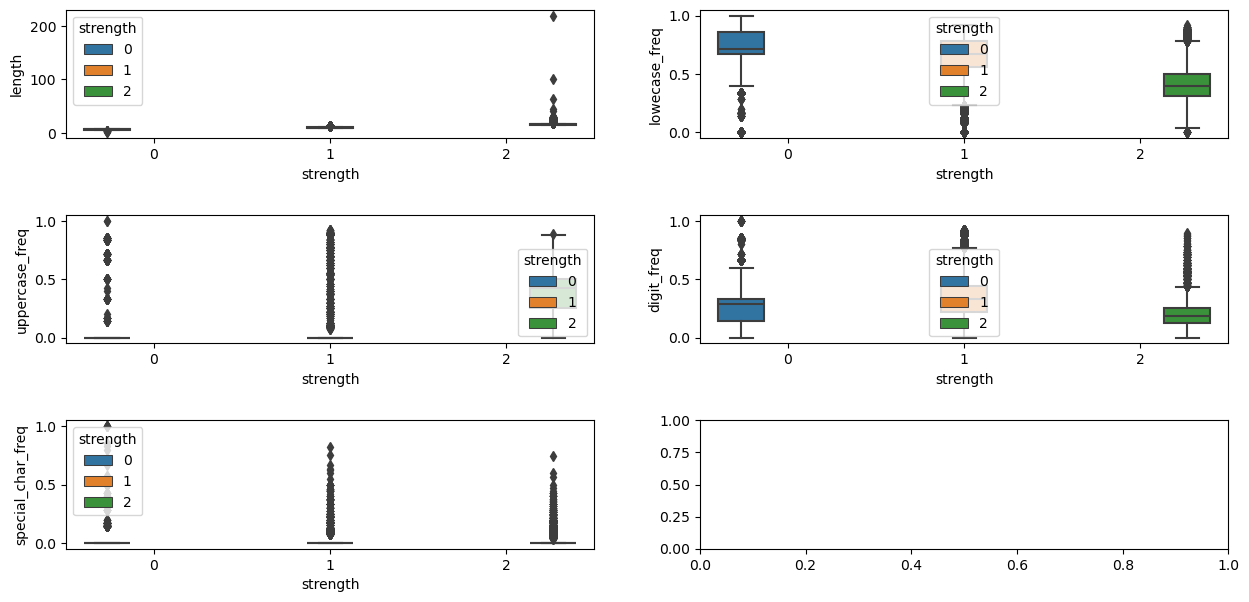

In [152]:
fig ,((ax1,ax2),(ax3,ax4),(ax5,ax6))=plt.subplots(3,2,figsize=(15,7))
sns.boxplot(x="strength" , y='length', hue="strength", ax=ax1,data=data)
sns.boxplot(x="strength" , y='lowecase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

 applying TF-IDF (Term Frequency-Inverse Document Frequency) on Data 

In [157]:
data.head(4)

,password,strength,length,lowecase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043


In [159]:
data

,password,strength,length,lowecase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000


In [161]:
##shuffling randomly for the robustness of Ml model
dataframe=data.sample(frac=1)

In [163]:
dataframe

,password,strength,length,lowecase_freq,uppercase_freq,digit_freq,special_char_freq
3458,uk214458,1,8,0.250,0.000,0.750,0.0
82665,CAOS66,0,6,0.000,0.667,0.333,0.0
8197,sexoanal69,1,10,0.800,0.000,0.200,0.0
29029,12xxxx,0,6,0.667,0.000,0.333,0.0
9189,ironurun96,1,10,0.800,0.000,0.200,0.0
...,...,...,...,...,...,...,...
19642,MV902kDk0OAth8x8,2,16,0.312,0.312,0.375,0.0
89701,baginda23,1,9,0.778,0.000,0.222,0.0
45158,qGldeIjY0MQ6oD3x,2,16,0.438,0.375,0.188,0.0
47439,8knGtZjQ4NwsjETp,2,16,0.500,0.375,0.125,0.0


In [167]:
x=list(dataframe["password"])

In [171]:
## import Tf-IDF vectorizer to convert text data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

In [173]:
vectorizer = TfidfVectorizer(analyzer="char")

In [175]:
X = vectorizer.fit_transform(x)

In [179]:
X.shape

(100000, 99)

In [183]:
dataframe["password"].shape

(100000,)

In [185]:
##to get entire matrix of TF-IDF for 100000 passwords ..
X.toarray

<bound method _cs_matrix.toarray of <100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>>

In [187]:
##Tf-IDF scores of Ist row 
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.22993174, 0.26601987, 0.        , 0.65794255,
       0.33306067, 0.        , 0.        , 0.3366039 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.34288636, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.31886325, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [189]:
dataframe["password"]

3458             uk214458
82665              CAOS66
8197           sexoanal69
29029              12xxxx
9189           ironurun96
               ...       
19642    MV902kDk0OAth8x8
89701           baginda23
45158    qGldeIjY0MQ6oD3x
47439    8knGtZjQ4NwsjETp
23422             zelle08
Name: password, Length: 100000, dtype: object

In [191]:
len(vectorizer.get_feature_names_out())

99

In [193]:
vectorizer.get_feature_names_out()


array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [195]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [197]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


__APLYING MACHINE LEARNING ALGORITHM__

In [200]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowecase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [204]:
df2["length"] = dataframe['length']
df2["lowecase_freq"] = dataframe['lowecase_freq']

In [206]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowecase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [208]:
y = dataframe["strength"]

In [210]:
##split the data
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [216]:
X_train.shape

(80000, 101)

In [218]:
y_train.shape

(80000,)

In [220]:
from sklearn.linear_model import LogisticRegression

In [222]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes
clf = LogisticRegression(multi_class="multinomial")


In [224]:
clf.fit(X_train , y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [226]:
clf.fit(X_train , y_train)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [228]:
y_pred = clf.predict(X_test) 

In [230]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [232]:
from collections import Counter

In [240]:
Counter(y_pred)

Counter({1: 16888, 2: 1724, 0: 1388})

In [242]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [244]:
accuracy_score(y_test , y_pred)

0.80325

In [246]:
confusion_matrix(y_test , y_pred)

array([[  705,  1927,     2],
       [  623, 13916,   278],
       [   60,  1045,  1444]], dtype=int64)

In [248]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.51      0.27      0.35      2634
           1       0.82      0.94      0.88     14817
           2       0.84      0.57      0.68      2549

    accuracy                           0.80     20000
   macro avg       0.72      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000

